<a href="https://colab.research.google.com/github/561Aloha/561Aloha/blob/main/Heart_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Run these Libraries first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

data = pd.read_csv('heart_failure_clinical_dataset.csv')
data.columns
#data.info()
#data.describe().T

from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#From sklearn.cluster import KMeans

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
#data['K-Nearest Neighbor'] = KNeighborsClassifier()


#Doing Linear Regression.
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')


In [ ]:
Task 1: Clustering Analysis

1.1. Apply K-Means clustering to the dataset using all features except 'DEATH_EVENT.'

1.2. Determine the optimal number of clusters and visualize the clusters.

1.3. Implement Kernel K-Means clustering with the same features and visualize the results.

1.4. Apply Expectation Maximization (EM) clustering.

1.5. Compare and contrast the clustering results from K-Means, Kernel K-Means, and EM.

1.6. Analyze the clinical significance of patient clusters in predicting 'DEATH_EVENT.'

"""

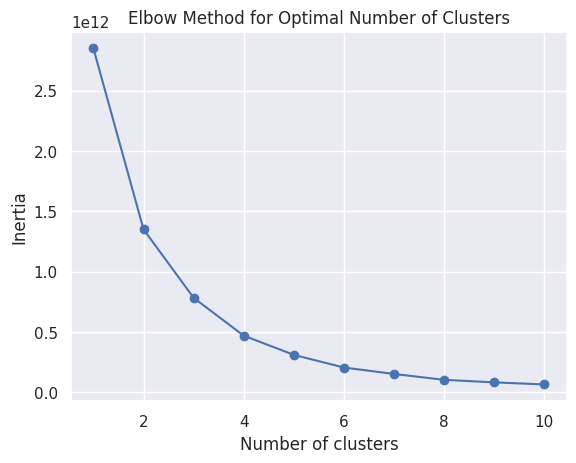

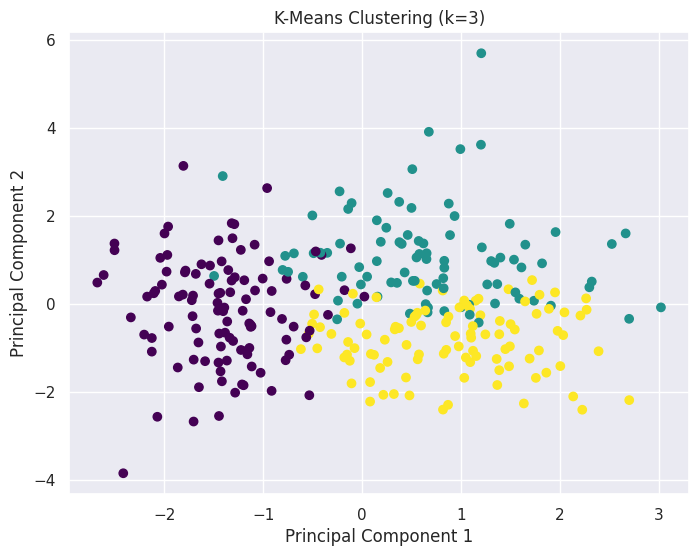

In [ ]:
#Testing KMEANS CLUSTERING
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


#Features in the CSV, besides 'Death Event'
selected_features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
X = data[selected_features]


scaler = StandardScaler()
X_std = scaler.fit_transform(X)

#Task 1.2: Determine the optimal number of clusters and visualize the clusters.
#Elbow method to find the optimal number of clusters, which I found it to be between 3 or 4
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(X)


#specified number of clusters (k).
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_std)
data['cluster'] = clusters

# Reduce dimensionality for visualization (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Create a scatter plot for visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title(f'K-Means Clustering (k={k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


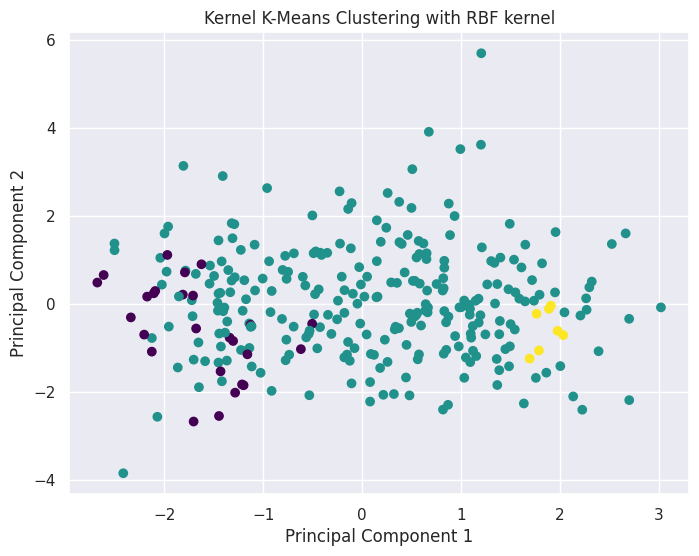

In [ ]:
from scipy.spatial.distance import cdist

# Standardize the features (important for K-Means)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Calculate the  specified features using the Radial Basis Function (RBF) kernel and visualize the results kernel matrix
def rbf_kernel(X, sigma):
    pairwise_dists = cdist(X, X, 'euclidean')
    return np.exp(-pairwise_dists ** 2 / (2.0 * sigma ** 2))

sigma = 1.0
K = rbf_kernel(X_std, sigma)

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(K)

# Add cluster labels to the dataset
data['cluster'] = clusters

# Reduce dimensionality for visualization (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Create a scatter plot for visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Kernel K-Means Clustering with RBF kernel')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

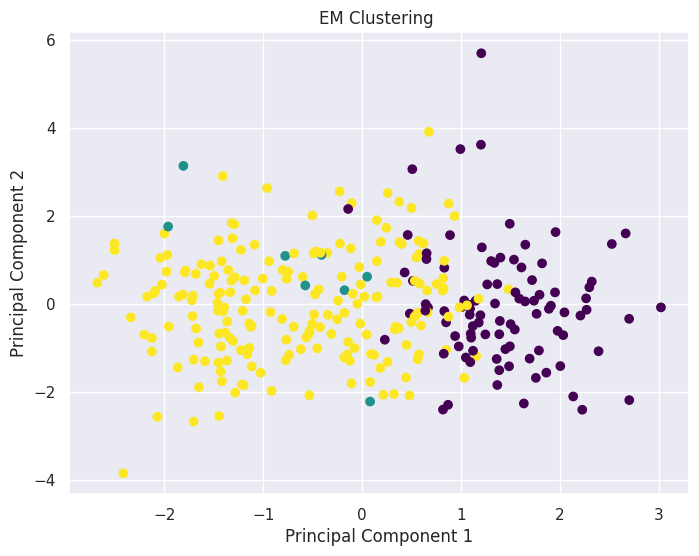

In [ ]:
from sklearn.mixture import GaussianMixture

# Perform EM clustering with a specified number of components (clusters)
n_components = 3
gmm = GaussianMixture(n_components=n_components, random_state=42)
clusters = gmm.fit_predict(X_std)

# Add cluster labels to the dataset
data['cluster'] = clusters

# Reduce dimensionality for visualization (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Create a scatter plot for visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('EM Clustering ')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Chi-squared statistic: 3.4945496262534514
p-value: 0.1742481557851845


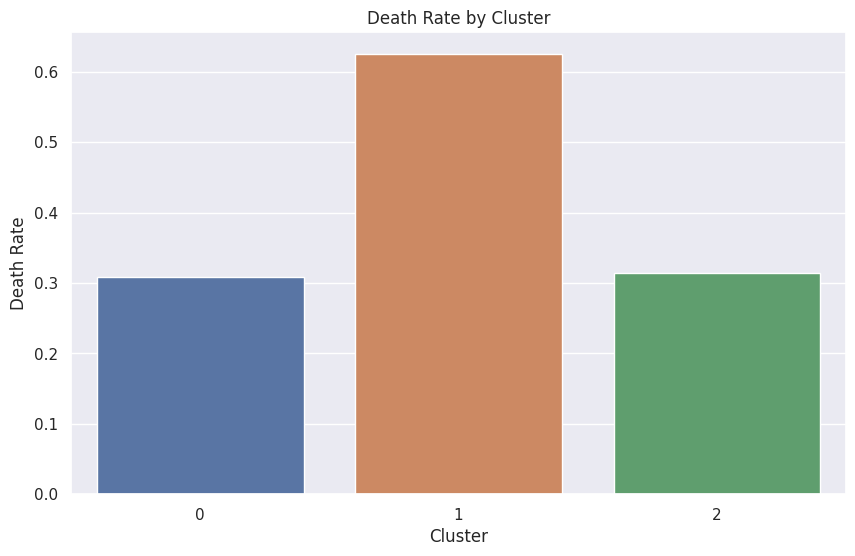

" I used the chi-squared test to determine if there is a significant difference in 'DEATH_EVENT' rates between clusters. Which has a result of 3.494549\n"

In [ ]:
from sklearn.metrics import confusion_matrix
from scipy.stats import chi2_contingency
import seaborn as sns


cluster_column = 'cluster'

# Calculate 'DEATH_EVENT' statistics for each cluster
results = []

for cluster_label in data[cluster_column].unique():
    cluster_data = data[data[cluster_column] == cluster_label]
    death_count = len(cluster_data[cluster_data['DEATH_EVENT'] == 1])
    total_count = len(cluster_data)
    death_rate = death_count / total_count
    survival_rate = 1 - death_rate
    results.append({
        'Cluster': cluster_label,
        'Death Rate': death_rate,
        'Survival Rate': survival_rate,
    })

#Made a new dataframe with the stored resuls
results_df = pd.DataFrame(results)

# Chi
observed = np.array([data[data[cluster_column] == cluster_label]['DEATH_EVENT'].value_counts().sort_index().values for cluster_label in data[cluster_column].unique()])
chi2, p, _, _ = chi2_contingency(observed)
print(f'Chi-squared statistic: {chi2}')
print(f'p-value: {p}')

# Visualize 'DEATH_EVENT' rates by cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Death Rate', data=results_df)
plt.title('Death Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Death Rate')
plt.show()


For1.6. Analyze the clinical significance of patient clusters in predicting 'DEATH_EVENT.'

i used from lecture 3, the Chi-squared statisitcs to tdetermine if there is a significant difference in 'DEATH_EVENT' rates between clusters. Which has a result of 3.494549.

Part Two



In [ ]:

#Task 2.1 Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


#2.2. Perform Linear Regression using relevant clinical features to predict 'DEATH_EVENT.'
model = LinearRegression()
#Fitting the Model
x = data[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
          'ejection_fraction', 'high_blood_pressure', 'platelets',
          'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
y = data['DEATH_EVENT']

model.fit(x, y)
model = LinearRegression().fit(x, y)
print()
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")  #this outouts .416836174
print()

#task 2 Performing a Ridge Regression anaylysis
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization
ridge_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_ridge = ridge_model.predict(x_test)
linear_model = LinearRegression() # Create and fit the Linear Regression model
linear_model.fit(x_train, y_train)

# Calculate Linear Regression
r_sq_linear = linear_model.score(x_test, y_test)
print(f"Linear Regression: {r_sq_linear}")

# Ridge Regression
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)  # Create and fit the Ridge Regression model
ridge_model.fit(x_train, y_train)

# Calculate Ridge Regression
r_sq_ridge = ridge_model.score(x_test, y_test)
print(f"Ridge Regression: {r_sq_ridge}")




coefficient of determination: 0.41683617477905077

Linear Regression: 0.3061651651288687
Ridge Regression: 0.30687941675590413


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge


# Create and fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_linear = linear_model.predict(x_test)

# Evaluate Linear Regression using Mean Squared Error
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Mean Squared Error (Linear Regression): {mse_linear}")

# Create and fit the Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_ridge = ridge_model.predict(x_test)

# Evaluate Ridge Regression using Mean Squared Error
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Mean Squared Error (Ridge Regression): {mse_ridge}")


print()
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error for Linear Regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
print(f"Mean Absolute Error for Linear Regression: {mae_linear}")

# Calculate Mean Absolute Error for Ridge Regression
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f"Mean Absolute Error for Ridge Regression: {mae_ridge}")



Mean Squared Error (Linear Regression): 0.15985954595430862
Mean Squared Error (Ridge Regression): 0.15969498237943966

Mean Absolute Error for Linear Regression: 0.3372215889194335
Mean Absolute Error for Ridge Regression: 0.3369796686106992


2.5. Discuss the strengths and weaknesses of the Linear and Ridge Regression models for mortality prediction.   
  Linear Regression
  I believe that linear regression is not a great model for predicting mortality when it has binary attributes or complex data. You can't use it to accuracially measure things like sex,age, and smoking to determine the probability of death as accurately as if you used a continuous value.. Linear regression also performs poorly when there are non-linear relationships. Linear Regression deals with continuous values whereas classification problems mandate discrete or binary values. It's strengths are straightforward to understand and explain, and can be regularized to avoid overfitting.

  Ridge Regression:
  The pros of Ridge Regression is that it can helps you normalize (“shrink”) Linear Regression Coefficient values and estimate these coefficent values even when theindependent variables are highly correlated. The weakness/challenge of ridge regression is that it reduces the interpretability of the model coefficients. Ridge regression gives biased estimates that depend on the value of alpha. Value 1 worked for me, but there needs to be a balance.Two other weaknesses is that it doesn't work well with multi-collinearilty and it can be difficult to interpret if some of the variables are irrelevant or redundant.

# Part Three

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC



data= pd.read_csv('heart_failure_clinical_dataset.csv')
X = data.drop('DEATH_EVENT', axis=1) #Features and Target Variable for predicting "Death Event"
y = data['DEATH_EVENT']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Perform preprocessing (if needed), e.g., StandardScaler
ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

#Bayes Classifer
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for Regular Bayes: {accuracy:.2f}')

#Store classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machines': LinearSVC(),
    'K-Nearest Neighbor': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

models['Support Vector Machines'] = LinearSVC()

# Train and evaluate each model
accuracy, precision, recall = {}, {}, {}

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    accuracy[model_name] = accuracy_score(y_test, y_pred)
    precision[model_name] = precision_score(y_test, y_pred)
    recall[model_name] = recall_score(y_test, y_pred)

# Print the results
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

print(df_model)

data.head()

Accuracy for Regular Bayes: 0.67
                         Accuracy  Precision    Recall
Logistic Regression      0.773333   0.777778  0.518519
Support Vector Machines  0.773333   0.777778  0.518519
K-Nearest Neighbor       0.720000   0.714286  0.370370
Naive Bayes              0.666667   0.571429  0.296296


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


 The K-Means clustering method divided the data into three clusters of equal size, which identify unique patient groups with similar clinical features. Identifying these groups can help in tailoring treatments or interventions for different patient populations.

 Both Kernel K-Means and EM Clustering produced similar results with one cluster having more data points than the other two. This suggests that there might be a dominant group of patients with specific characteristics,potentially indicating high or low-risk groups.

 Linear Regression had a output of .306, which converts to 30,6%. This suggests that linear relationships alone may not be sufficient for accurate mortality prediction. Ridge Regression may help with overfitting as I suggested as a advantage, however because it also has a score of .307 it is a slight improvement of the prediction, but still not enough to accurately predict mortality rate.

Both models of Naive Byers and KNN classification achieved an accuracy of approximately 0.77. These models exhibit good predictive performance, indicating that they may be suitable for mortality prediction in cardiovascular medicine.

 While no single technique is perfect, they collectively offer valuable insights and tools to support clinical decision-making and patient care. The choice of the most suitable approach should consider the specific clinical context and data characteristics.
